In [29]:
# Add required imports for cleaning
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# This csv file is seperated by ; so we set sep = ';'
df = pd.read_csv('aug_train.csv').drop(columns=['enrollee_id'])

In [13]:
df.shape

(19158, 13)

In [38]:
df # We can already look there are many errors in the dataset.

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_filled_missing
0,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,Male
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,Male
2,21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,Missing
3,115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,Missing
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,Male
19154,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,Male
19155,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,Male
19156,65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,Male


In [93]:
df.info() # Analyzing the columns to look for the number of rows missing in each 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
 13  gender_filled_missing   19158 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [37]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
education_level            2.401086
last_new_job               2.207955
enrolled_university        2.014824
experience                 0.339284
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
target                     0.000000
gender_filled_missing      0.000000
dtype: float64

In [87]:
df[[x for x in df.columns if df[x].isnull().sum() > 0]].isna().sum().sort_values(ascending=False)

company_type           6140
company_size           5938
gender                 4508
major_discipline       2813
education_level         460
last_new_job            423
enrolled_university     386
experience               65
dtype: int64

In [91]:
cols_over_len = []
for x in df.columns:
    if df[x].dtype == 'object' and len(df[x].unique()) <=25:
        print(f'The column {df[x].dtype} : {x} \n {df[x].unique()}')
    elif (df[x].dtype == ('int' or 'float')) and len(df[x].unique()) <=10:
        print(f'The column {df[x].dtype} : {x} \n {df[x].unique()}')        
    else:
        cols_over_len.append(x)


The column object : gender 
 ['Male' nan 'Female' 'Other']
The column object : relevent_experience 
 ['Has relevent experience' 'No relevent experience']
The column object : enrolled_university 
 ['no_enrollment' 'Full time course' nan 'Part time course']
The column object : education_level 
 ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
The column object : major_discipline 
 ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
The column object : experience 
 ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
The column object : company_size 
 [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
The column object : company_type 
 [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
The column object : last_new_job 
 ['1' '>4' 'never' '4' '3' '2' nan]
The column object : gender_filled_missing 
 ['Male' 'Missing' 'Female' 'Other']


In [60]:
cols_over_len

['city', 'city_development_index', 'experience', 'training_hours', 'target']

In [45]:
len(df['city'].unique())

123

In [17]:
for x in df.columns:
    if df[x].isnull().sum() <= 0.05*df.shape[0] and df[x].isnull().sum() > 0:
        print(x)

enrolled_university
education_level
experience
last_new_job


In [92]:
df['city'] = df['city'].str.strip("city_").astype(int)

In [31]:
df['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [32]:
df['gender_filled_missing'] = df['gender'].fillna('Missing')

<Axes: xlabel='gender_filled_missing', ylabel='count'>

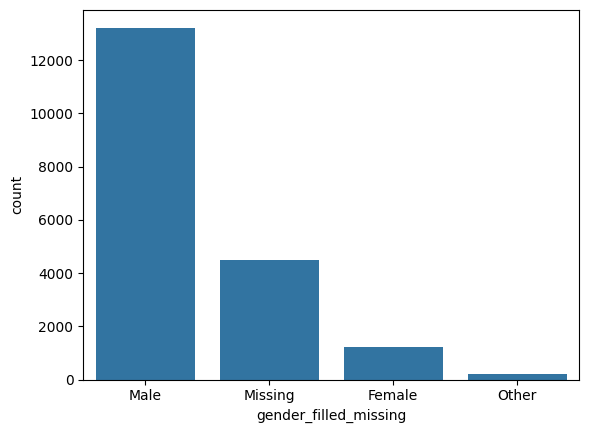

In [34]:
sns.countplot(
    data = df,
    x = 'gender_filled_missing'
)